# Project: Investigate a Dataset - [TMDB Movie Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This collected data consists of 2 datasets **tmdb_5000_movies** and **tmdb_5000_credits** include data about almost 5,000 movie collected from **TMDB**. The 2 datasets combined contain 24 columns include information about movies such as generes, cast, budget, revenue and date of release.


### Question(s) for Analysis

>#### Question1 : Correlation between profit of movies and their popularity, runtime, budget and vote average.
>#### Question2 : What are the most popular genres?
>#### Question3 : Can specific genre affect the profit? What is the genres with highest and lowest average profit?
>#### Question4 : What are the most popular genres in each decade of the last 5 decades?
>#### Question5 : Who are the most frequent main actors in movies' casts in the last decade within the most 25% popular movies?

# Data Wrangling

In [1]:
#import liabararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

#loading 2 datasets 
df1 = pd.read_csv('tmdb_5000_movies.csv')
df2 = pd.read_csv('tmdb_5000_credits.csv')

In [2]:
#displaying sample of the tmdb_5000_movies dataset
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#displaying sample of the tmdb_5000_credits dataset
df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#merging 2 datasets into 1 dataset  
df= df1.merge(df2,left_on='id',right_on='movie_id',how='inner')

In [5]:
#displaying sample of the merged datasets
df.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,

In [6]:
# getting information of data to know datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
# displyaing summary statistics of the dataset
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [8]:
#displyaing number of columns and rows of the dataset
df.shape

(4803, 24)

In [9]:
#displaying count of nulls in each column
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [10]:
#displaying number of duplicated rows in the dataset
df.duplicated().sum()

0

>### 1. Removing Unessecary Columns

In [11]:
df.drop(['homepage','tagline','keywords','status','overview','spoken_languages','crew','title_x','title_y','movie_id'],axis=1,inplace=True)
df.head(20)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,7.4,3330,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo..."
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,7.3,6767,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir..."
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,en,Harry Potter and the Half-Blood Prince,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,7.4,5293,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""..."
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,en,Batman v Superman: Dawn of Justice,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,5.7,7004,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B..."


>### 2. Extracting movie main genre from genres column

In [12]:
#creating et_movie_genre funcion to extract specific values from crowded columns 
def get_data(genres_data):
    genres_list=eval(genres_data)
    if genres_list:
        return genres_list[0]['name']
    else: return 'N/A'
    
#extracting movie main genre using get_movie_genre function
df['genres']=df['genres'].apply(get_data)

In [13]:
#spare function to return all generes for a movie
# def get_genre(genres_data):
#     genres_list=eval(genres_data)
#     return [genre['name'] for genre in genres_list]
# df['genres']=df['genres'].apply(get_genre)

In [14]:
#displaying sample of the updated dataset
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast
0,237000000,Action,19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,245000000,Action,206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,250000000,Action,49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,260000000,Action,49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [15]:
#checking the different genres in genres column
df['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
N/A                  28
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [16]:
# dropping 'N/A' values in genres column to aviod wrong results
df= df[df['genres']!='N/A']

#making sure genres column doesn't contain 'N/A' value
'N\A' in df['genres']

False

>### 3. Extracting movie production country from production_countries column

In [17]:
#extraction production companies using get_data function
df['production_countries']=df['production_countries'].apply(get_data)

In [18]:
#checking count of values in each unique vale in production_countries column
df['production_countries'].value_counts(ascending=False)

United States of America    3098
United Kingdom               374
Canada                       219
Germany                      200
France                       174
                            ... 
Singapore                      1
Peru                           1
Malta                          1
Philippines                    1
Kenya                          1
Name: production_countries, Length: 70, dtype: int64

In [19]:
#checking count of values in each unique vale in original_language column
df['original_language'].value_counts(ascending=False)

en    4477
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

>### 4. Converting the type of release_date column to datetime

In [20]:
df['release_date']=pd.to_datetime(df['release_date'])

#checking the release_date column type to make sure its datetime
df.dtypes

budget                           int64
genres                          object
id                               int64
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
vote_average                   float64
vote_count                       int64
cast                            object
dtype: object

>### 5. Inserting new column 'profit'

In [21]:
df['profit']=df['revenue']-df['budget']

#displaying sample of the updated dataset
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,profit
0,237000000,Action,19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",United States of America,2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2550965087
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",United States of America,2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",661000000
2,245000000,Action,206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",United Kingdom,2015-10-26,880674609,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",635674609
3,250000000,Action,49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",United States of America,2012-07-16,1084939099,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",834939099
4,260000000,Action,49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",United States of America,2012-03-07,284139100,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",24139100


In [22]:
# checking profit column statistics
df['profit'].describe()

count    4.775000e+03
mean     5.352807e+07
std      1.363044e+08
min     -1.657101e+08
25%     -9.065000e+05
50%      2.741288e+06
75%      5.566747e+07
max      2.550965e+09
Name: profit, dtype: float64

>### 6. Extracting main actors names from cast column

In [23]:
#Extracting main actors names from cast column using get_data function
df['cast']=df['cast'].apply(get_data)

In [24]:
#displaying count of values of each unique value in cast column
df['cast'].value_counts()

Bruce Willis        30
Robert De Niro      30
Nicolas Cage        29
Johnny Depp         27
N/A                 27
                    ..
Neel Sethi           1
John Cassavetes      1
James Gandolfini     1
Mekhi Phifer         1
Eric Mabius          1
Name: cast, Length: 2086, dtype: int64

In [25]:
# dropping 'N/A' values in cast column to aviod wrong results
df= df[df['cast']!='N/A']

#making sure genres column doesn't contain 'N/A' value
'N\A' in df['cast']

False

In [26]:
#displaying sample of the cleaned dataset
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,profit
0,237000000,Action,19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",United States of America,2009-12-10,2787965087,162.0,7.2,11800,Sam Worthington,2550965087
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",United States of America,2007-05-19,961000000,169.0,6.9,4500,Johnny Depp,661000000
2,245000000,Action,206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",United Kingdom,2015-10-26,880674609,148.0,6.3,4466,Daniel Craig,635674609
3,250000000,Action,49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",United States of America,2012-07-16,1084939099,165.0,7.6,9106,Christian Bale,834939099
4,260000000,Action,49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",United States of America,2012-03-07,284139100,132.0,6.1,2124,Taylor Kitsch,24139100


# Data Exploration

## Research Question 1 (Correlation between profit of movies and their popularity, runtime, budget and vote average.)

## 1. Profit vs Popularity

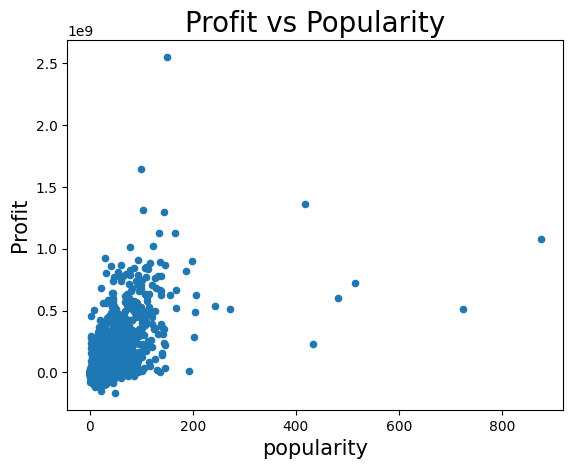

In [27]:
#making scatterplot of profit and popularity to display correlation between them
df.plot(x="popularity", y="profit", kind="scatter")
plt.title('Profit vs Popularity',fontsize=20)
plt.xlabel('popularity', fontsize=15)
plt.ylabel('Profit', fontsize=15);

This shows that there is Positive correlation between profit and popularity, hence increasing popularity factors can significantly increase the movie profit.

## 2. Profit vs Runtime

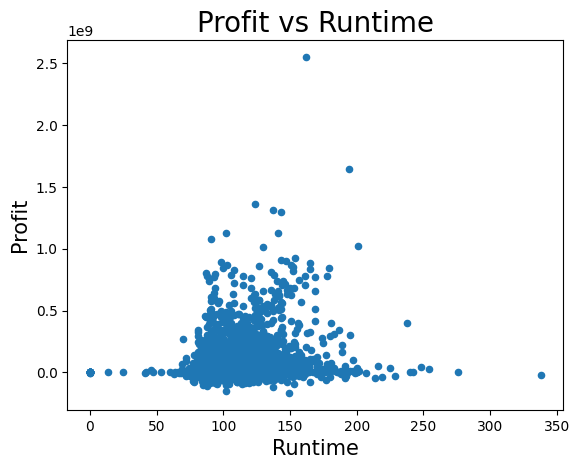

In [28]:
#making scatterplot of profit and runtime to display correlation between them
df.plot(x="runtime", y="profit", kind="scatter");
plt.title('Profit vs Runtime',fontsize=20)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Profit', fontsize=15);

This shows that there is no clear correlation between profit and runtime.

## 3. Profit vs Budget

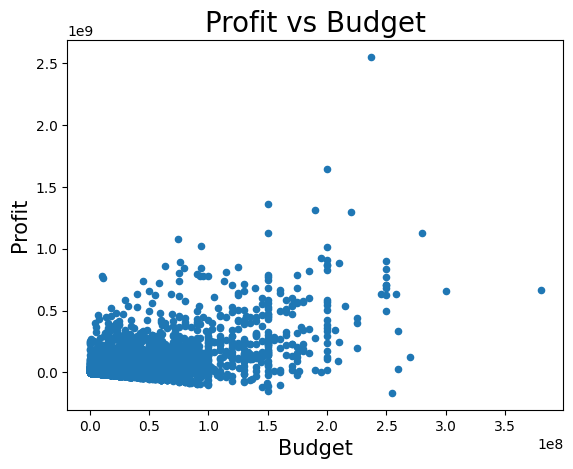

In [29]:
#making scatterplot of profit and budget to display correlation between them
df.plot(x="budget", y="profit", kind="scatter");
plt.title('Profit vs Budget',fontsize=20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Profit', fontsize=15);

This shows that there is no clear correlation between profit and budget.

## 4. Profit vs Vote Average

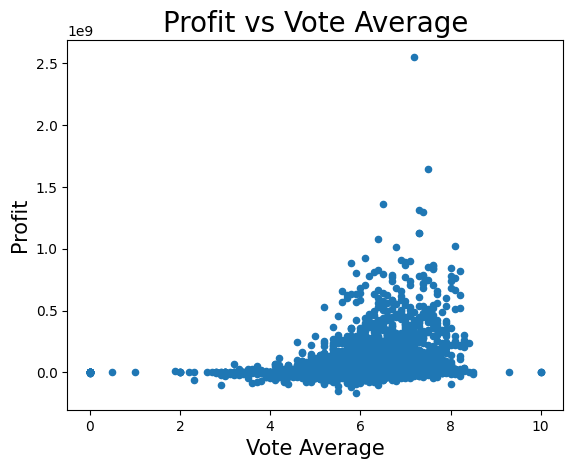

In [30]:
#making scatterplot of profit and vote average to display correlation between them
df.plot(x="vote_average", y="profit", kind="scatter");
plt.title('Profit vs Vote Average',fontsize=20)
plt.xlabel('Vote Average', fontsize=15)
plt.ylabel('Profit', fontsize=15);

This shows that there is no clear correlation between profit and vote average.

## Research Question 2  (What are the popular genres? What are the genres with the most and least popularity?)

In [31]:
#getting most popular movie genre
genres_popularity = df.groupby('genres')['popularity'].mean()
genre_high_popularity = genres_popularity.idxmax()
genre_high_popularity

'Science Fiction'

In [32]:
#getting least popular movie genre
genres_popularity = df.groupby('genres')['popularity'].mean()
genre_low_popularity = genres_popularity.idxmin()
genre_low_popularity

'Foreign'

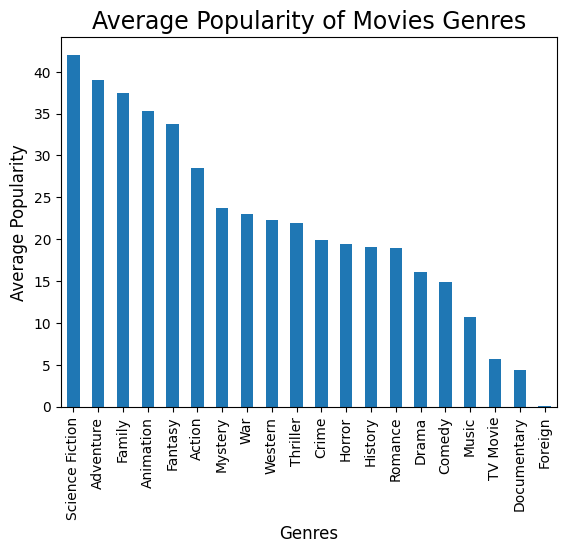

In [33]:
# displaying the average popularity of eache movie genre
df.groupby('genres')['popularity'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Average Popularity of Movies Genres',fontsize=17)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12);

This clearly shows that genre with highest average popularity is 'Science Fiction' and genre with lowest average popularity is 'Foreign'.

## Research Question 3  (Can specific genre affect the profit? What is the genres with highest and lowest average profit?)

In [34]:
#getting genre with highest profit
genres_profit = df.groupby('genres')['profit'].mean()
genre_high_profit = genres_profit.idxmax()
genre_high_profit

'Animation'

In [35]:
#getting genre with lowest profit
genres_profit = df.groupby('genres')['profit'].mean()
genre_lowofit = genres_profit.idxmin()
genre_lowofit

'TV Movie'

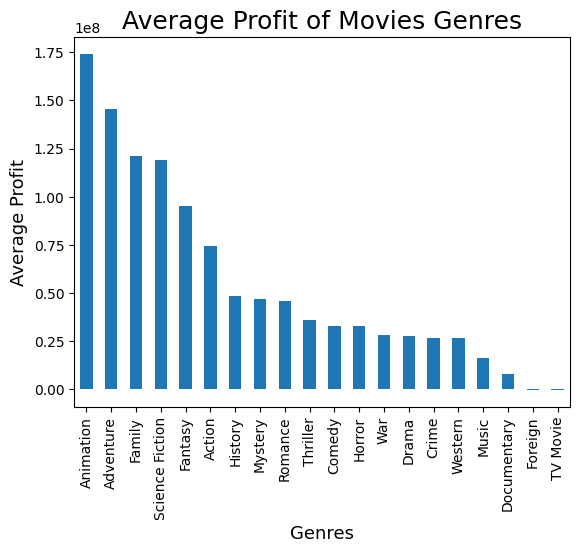

In [36]:
#displyaing the average profit of each movie genre
df.groupby('genres')['profit'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Average Profit of Movies Genres',fontsize=18)
plt.xlabel('Genres', fontsize=13)
plt.ylabel('Average Profit', fontsize=13);

This clearly shows that genre with highest average profit is 'Animation' and genre with lowest average profit is 'TV Movie', hence choosing specific generes can be an important factor in increasing the profit.

## Research Question 4 (What are the most popular genres in each decade the last 5 decades?)

In [37]:
#converting relaese date to years only
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [38]:
#checking values in the update release_date column
df['year'].unique()

array([2009, 2007, 2015, 2012, 2010, 2016, 2006, 2008, 2013, 2011, 2014,
       2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1998, 2000, 1990,
       1991, 1994, 1996, 1982, 1993, 1979, 1992, 1989, 1984, 1988, 1978,
       1962, 1980, 1972, 1981, 1968, 1985, 1940, 1963, 1987, 1986, 1973,
       1983, 1976, 1977, 1970, 1971, 1969, 1960, 1965, 1964, 1927, 1974,
       1937, 1975, 1967, 1951, 1961, 1946, 1953, 1954, 1959, 1932, 1947,
       1956, 1945, 1952, 1930, 1966, 1939, 1950, 1948, 1958, 1957, 1944,
       1938, 1949, 1936, 2017, 1941, 1955, 1942, 1929, 1935, 1933, 1916,
       1934, 1925], dtype=int64)

In [39]:
#checking earliest and latest dates of release_year column 
df['year'].describe()

count    4748.000000
mean     2002.399747
std        12.447364
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: year, dtype: float64

In [40]:
#creating decades bins of the release_year column
bins_edges = [1970,1980,1990,2000,2010,2017]
bins_names = ['1970s','1980s','1990s','2000s','2010s']
df['decades'] = pd.cut(df['year'], bins_edges,labels =bins_names )

In [41]:
#checking count of values of the unique values of decades 
df['decades'].value_counts()

2000s    2088
2010s    1193
1990s     909
1980s     284
1970s     119
Name: decades, dtype: int64

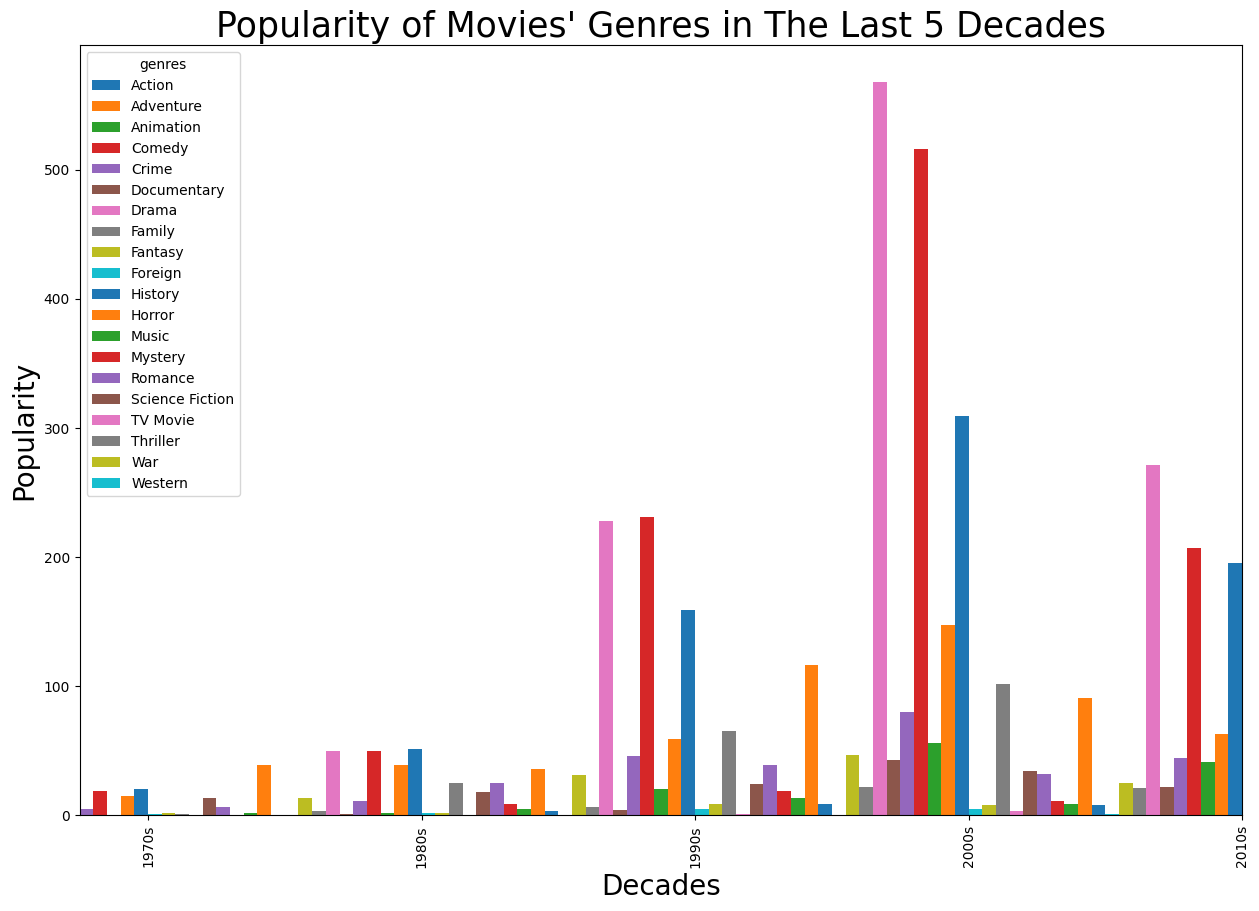

In [42]:
#displyaing the popularity of genres in ech decade
fig, ax = plt.subplots(figsize=(15,10))
df.groupby(['decades','genres'])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-1,align='edge' );
plt.title("Popularity of Movies' Genres in The Last 5 Decades",fontsize=25)
plt.xlabel('Decades', fontsize=20)
plt.ylabel('Popularity', fontsize=20);

This clearly shows that the most popular genres of **1970s**, **1980s**, **1990s**, **2000s** and **2010s** are 'Drama', 'Comedy' and 'Action'. 

## Research Question 5 (Who are the 10 most frequent main actors in movies' casts in the last decade within the most 25% popular movies?)

In [43]:
#creating a copy of the orginal dataframe
df_copy = df.copy()
#filtering datset with the last decade
df_copy = df_copy[df_copy['year']>=2010]

In [44]:
#getting summary statistics of 'popularity column'
df['popularity'].describe()

count    4748.000000
mean       21.739203
std        31.917119
min         0.000372
25%         4.932202
50%        13.261481
75%        28.616428
max       875.581305
Name: popularity, dtype: float64

In [45]:
#filtering datset with the most 25% popular movies
df_copy = df_copy[df_copy['popularity']>28.616428]

In [46]:
#cheching the filtered dataset based on 'year' column
df_copy['year'].value_counts()

2013    104
2014     90
2015     86
2012     69
2011     65
2010     54
2016     50
Name: year, dtype: int64

Text(0.5, 0, 'Actors')

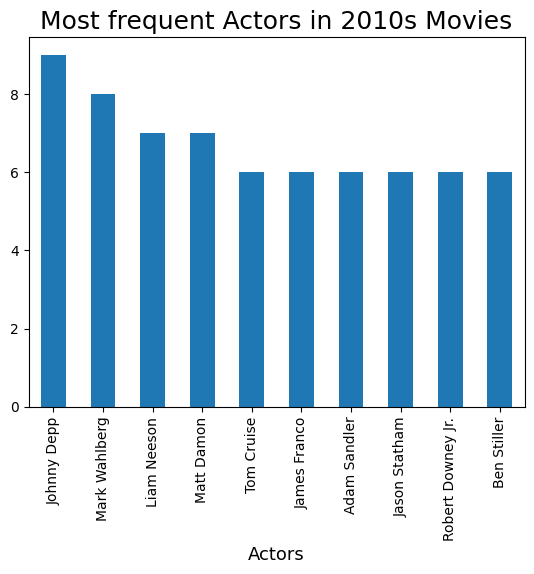

In [47]:
#creating bar chart indicates the 10 most frequent actors
df_copy['cast'].value_counts().sort_values(ascending=False)[:10].plot.bar();
plt.title('Most frequent Actors in 2010s Movies', fontsize=18)
plt.xlabel('Actors', fontsize=13)

This clearly shows that the 10 most frequent main actors in movies' casts in the last decade within the most 25% popular movies are ('Johnny Depp', 'Mark Wahlberg', 'Liam Neeson', 'Matt Damon', 'Tom Cruise', 'James Franco', 'Adam Sandler', 'Jason Statham', 'Robert Downey Jr.', 'Ben Stiller') respectively.

### <a id='conclusions'></a>
## Conclusions

### Findings from the datasets analysis : 
1. There is a positive correlation between **popularity** of movies and **profit** which means that popularity is an important factor to increase the profit compared to other factors.
2. Movie genre with highest averag popularity is **Science Fiction**, and movie genre with lowest average popularity is **Foreign**.
3. Genre with highest averge profit is **Animation**, and genre with lowest average profit is **TV Movie**.
4. The most 3 popular genres in the last 5 decades are **Darama**, **Comedy** and **Action**.
5. The **10 most frequent main actors** in movies' casts in the **last decade** within the **25% most popular movies** are :
* Johnny Depp
* Mark Wahlberg
* Liam Neeson
* Matt Damon
* Tom Cruise
* James Franco
* Adam Sandler
* Jason Statham
* Robert Downey Jr.
* Ben Stiller

### Limitations
Amount of data in this dataset is not sufficient for accuarete and clear analysis results. In addition there is a significant bias to some production countries and langages in the collect data which may lead to biased results.